In [3]:
import numpy as np # a package for scientific computing
import tensorflow as tf # a platform for machine learning
import matplotlib.pyplot as plt # a library to plot graphs

# keras is an api built into tenserflow to design, train and implement NNs 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid



In [6]:
# Loading data from the data Folder
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    return X, y

- The first part of the training set contains 5000 training examples of handwritten digits provided by MNIST
  - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
  - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
  - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
  - This gives us a 5000 x 400 matrix X where every row is a training example of a handwritten digit image.
- The second part of the training set is a 5000 x 1 dimensional vector y that contains labels for the training set

In [7]:
X, y = load_data()

In [11]:
print(f' This row \n {X[0]} \n is a vectorized presentation of a picture for the number : {y[0,0]}')   

 This row 
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

this is a a batch of 64 random training examples


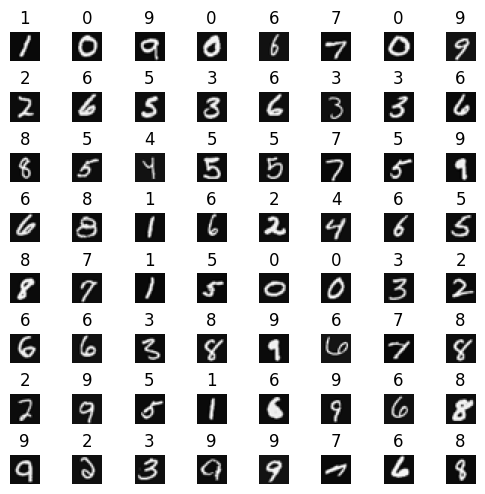

In [18]:
# Ploating a batch of 64 training examples 
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 1]) #[left, bottom, right, top]
print('this is a a batch of 64 random training examples')
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image so we dont get an inverted one 
    X_random_reshaped = X[random_index].reshape((20,20)).T 
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()


In [19]:
tf.random.set_seed(1234) # for consistent results
# The neural network's architecture 
model = Sequential(
    [               
        Dense(units = 25 ,activation = 'relu',input_shape=(400,), name = "L1"),
        Dense(units = 15 ,activation = 'relu', name = "L2"),
        Dense(units = 10 ,activation = 'linear', name = "L3") 
        # The numerical stability will be improved if the softmax is grouped with the loss function 
        # Therfore, it's better to use the Linear activation in the ouput layer
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
####  Weights and Biases shapes examination 
[layer1, layer2, layer3] = model.layers 
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

# the bias shape (n,) is a convetion used in tf, it's the same as (1, n) 

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [23]:
# handwritten digits recognition is a multiclass classification problem, therefore we will use Softmax Regression
# Normally, the SparseCategoricalCrossentropy function expects predicted probabilities as input. It compares these probabilities to the true labels.

# knowing that the neural network will produce unnormalized values that can be positive, negative, or zero ( not probabalities ) since we used a Linear Activation in the ouput layer and not a Softmax Activation
# while training the model using the SparseCategoricalCrossentropy function, setting from_logits=True will internally apply the softmax activation function to the logits before computing the loss. This ensures that the logits are transformed into valid probabilities 
# and to make your model training more numerically stable
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)



In [25]:
# Using the Adaptive Moment Estimation Optimization Algorithm adapts the learning rate to ensure fast convergence of the loss

# the number of epochs was set to 40, this means that the entire data set should be applied during training 40 times.
# For efficiency, the training data set is broken into 'batches'. 
# The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches


history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 9.4960e-04
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 9.0794e-04
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 8.6339e-04
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 8.1184e-04
Epoch 12/40
157/157 [==============================] - 0s 3ms/step - loss: 7.8970e-04
Epoch

1/1 [==============================] - 0s 19ms/step


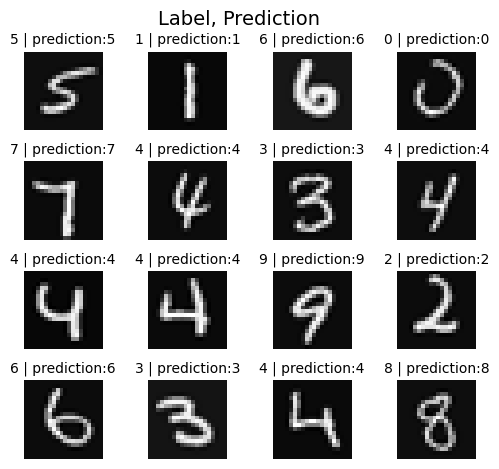

In [30]:
# Let's compare the predictions vs the labels for a random sample of 4 Handwritten digits.

m, n = X.shape

fig, axes = plt.subplots(4,4, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T


    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400)) # predict() returns an array of unormalised values 
    prediction_p = tf.nn.softmax(prediction) # applying softmax
    yhat = np.argmax(prediction_p) # getting the index of the element with the higher probability
    
    ax.set_title(f"{y[random_index,0]} | prediction:{yhat}",fontsize=10)
    ax.set_axis_off()
    
fig.suptitle("Label, Prediction", fontsize=14)
plt.show()